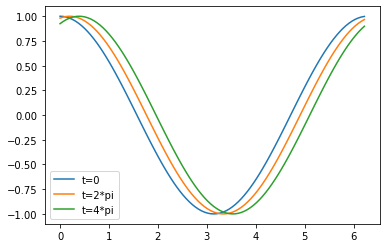

In [4]:
import matplotlib.pyplot as plt 
from matplotlib.animation import FuncAnimation
import numpy as np
from time import sleep
from math import pi, cos , sin ,exp ,ceil
from IPython import display
#%matplotlib notebook

########################################user defined variables#######################################
N = 100 #number of grid points
cfl = 10 #v
endtime = 2*pi #simulation time
initials = 'cos' #  'sin' or 'e' or 'cos' 
space_dis = 'ccd4' #  'cd2' or 'ccd4' or 'fd1'
time_dis = 'cn' #  'cn' or 'rk4' or 'euler'
vid = False # true for video false for plots

##################################################################################################


#Preproccecsing definitions
if vid== False:
    endtime = 4*pi+abs(cfl*(2*pi/N))
a = -1
l = 2*pi
h = l/N
delT = abs(cfl*h/a)
StepN = ceil(endtime/delT)
x = np.linspace(0, l-h, num=N)



######################################Initial shape conditions###################################
if initials == 'cos':
    ylimmite = 1.1
    def Buildphis(n):
        return np.cos(x)       
elif initials == 'sin':
    ylimmite = 2.2
    def Buildphis(n):
        return np.sin(x)+np.cos(10*x)
elif initials== 'e':
    ylimmite = 1.3
    def Buildphis(n):
        s = np.zeros([n])
        for i in range(n):
            s[i] = exp(-((x[i]-pi)**2)/((2*0.25)**2))
        return s
######################################End of Initial shape conditions###################################



#########################################Space scheme conditions###############################
if space_dis == 'fd1':
    def derivate(N,s):
        M = np.zeros([N,N])
        for i in range(N-1):
            M[i,i+1] = 1
            M[i,i] = -1
            M[N-1,0] = 1
            M[N-1,N-1] = -1
        M = (1/h)*M
        D = M.dot(s)
        return D, M
elif space_dis == 'cd2':
    def derivate(N,s):
        M = np.zeros([N,N])
        for i in range(N-2):
            M[i,i+1] = 2
            M[i,i+2] = -1/4
            M[i+1,i] = -2
            M[i+2,i] = 1/4
            M[0,N-1] = -2
            M[N-1,N-2] = -2
            M[N-1,0] = 2
            M[N-2,N-1] = 2
            M[0,N-2] = 1/4
            M[1,N-1] = 1/4
            M[N-2,0] = -1/4
            M[N-1,1] = -1/4            
        M = (1/(3*h))*M
        D = M.dot(s)
        return D,M
elif space_dis == 'ccd4':
    def derivate(N,s):
        M = np.zeros([N,N])
        B = np.zeros([N,N])
        for i in range(N-1):
            M[i,i+1] = 1
            M[i+1,i] = -1
            B[i,i] = 2/3
            B[i,i+1] = 1/6
            B[i+1,i] = 1/6
        M[0,N-1] = -1
        M[N-1,0] = 1
        B[0,N-1] = 1/6
        B[N-1,0] = 1/6
        B[N-1,N-1] = 2/3
        M= (1/(2*h))*M
        G = np.linalg.inv(B)
        m = G.dot(M)
        D = m.dot(s)
        return D,m
#########################################End of Space scheme conditions###############################

#########################################time scheme conditions###############################
if time_dis=='euler':
    def Tsolve(StepN,N):
        S = np.zeros([StepN,N])
        S[0,:] = Buildphis(N)
        for i in range(StepN-1):
            S[i+1,:] = S[i,:] +delT*(-a)*derivate(N,S[i,:])[0]
        return S
    
elif time_dis=='cn':
    def Tsolve(StepN,N):
        S = np.zeros([StepN,N])
        S[0,:] = Buildphis(N)
        for i in range(StepN-1):
#             T_vn1 = S[i,:] +delT*(-a)*derivate(N,S[i,:])
#             S[i+1,:] = S[i,:] +0.5*delT*((-a)*derivate(N,S[i,:])+(-a)*derivate(N,T_vn1))
            I = np.identity(N)
            dumy1 = np.linalg.inv(I+a*0.5*delT*derivate(N,S[i,:])[1])
            dumy2 = (S[i,:]+0.5*(-a)*delT*derivate(N,S[i,:])[0])
            S[i+1,:] = dumy1.dot(dumy2)
        return S
    
    
elif time_dis=='rk4':
    def Tsolve(StepN,N):
        S = np.zeros([StepN,N])
        S[0,:] = Buildphis(N)
        for i in range(StepN-1):
            k1 = derivate(N,S[i,:])[0]
            u2_1 = S[i,:] +0.5*delT*(-a)*k1
            k2 = derivate(N,u2_1)[0]
            u2_2 = S[i,:] +0.5*delT*(-a)*k2
            k3 = derivate(N,u2_2)[0]
            u3 = S[i,:] +delT*(-a)*k3
            k4 = derivate(N,u3)[0]
            S[i+1,:] = S[i,:] + (1/6)*delT*(-a)*(k1 +2*k2+2*k3+k4)
        return S
    
#########################################End of time scheme conditions###############################
S = Tsolve(StepN,N)



def animate(i):
    y = S[i,:]
    line.set_data((x,y))

if vid:
    fig = plt.figure()
    lines = plt.plot([])
    line = lines[0]
    plt.xlim(0, 2*pi)
    plt.ylim(-ylimmite,ylimmite)
    
    anim = FuncAnimation(fig,animate,frames = StepN, interval = 20)
    video = anim.to_html5_video()
    html = display.HTML(video)
    display.display(html)
    plt.close()
    
elif  not vid:
    plt.plot(x,S[0,:], label = 't=0')
    plt.plot(x,S[round(StepN/2),:], label = 't=2*pi')
    plt.plot(x,S[StepN-1,:], label = 't=4*pi')
    plt.legend()
    plt.show()
   
